# Title of ML project
# Predicting Term Deposit Subscriptions
### (A Machine Learning Approach to Optimize Direct Marketing Campaigns for a Portuguese Banking Institution)

# Name : GOKUL GOPAL

 **Organization:** Entri Elevate


**Date:** JAN-30-2025

# 1 - Overview of Problem Statement:

# The banking sector is increasingly leveraging data-driven strategies to enhance customer engagement and optimize marketing efforts. This project aims to predict whether clients of a Portuguese banking institution will subscribe to a term deposit based on data from direct marketing campaigns conducted via phone calls.

Context
The dataset includes information from marketing campaigns conducted between May 2008 and November 2010, featuring various demographic, financial, and contact-related attributes that may influence a client's decision.

Problem Definition
The primary objective is to classify clients into two categories: those who will subscribe to a term deposit ('yes') and those who will not ('no'). This classification is crucial for the bank to tailor its marketing strategies and improve conversion rates.

Challenges
Imbalanced Classes: The dataset may have an unequal distribution of subscriptions.
Feature Relevance: Identifying key predictive features is essential.
Overfitting: Ensuring the model generalizes well to unseen data.
Interpretability: Understanding the factors influencing client decisions is important for refining marketing strategies.
Goals
Develop an accurate machine learning model for predicting term deposit subscriptions.
Analyze feature impacts on subscription likelihood.
Provide actionable insights to enhance future marketing campaigns.
This project aims to equip the banking institution with a powerful tool for optimizing marketing efforts and improving customer acquisition strategies.


# 2 - Objective
## **To develop an accurate machine learning model for predicting client subscriptions to term deposits based on data from direct marketing campaigns conducted by a Portuguese banking institution.**

# 3 - Data Description

# Source   : UCI Machine Learning Repository (Bank Marketing Dataset)
# Features :
**Age:** Age of the client (integer)

**Job:** Type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')

**Marital Status:** Marital status of the client (categorical: 'divorced', 'married', 'single', 'unknown')

**Education Level:** Education level of the client (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')

**Default:** Whether the client has credit in default (binary: 'yes', 'no')

**Balance:** Average yearly balance in euros (integer)

**Housing Loan:** Whether the client has a housing loan (binary: 'yes', 'no')

**Personal Loan:** Whether the client has a personal loan (binary: 'yes', 'no')

**Contact:** Type of communication used to contact the client (categorical: 'cellular', 'telephone')

**Day of Week:** Last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

**Month:** Last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

**Duration:** Duration of the last contact in seconds (integer)

**Campaign:** Number of contacts performed during this campaign for this client (integer)

**Pdays:** Number of days since the client was last contacted from a previous campaign (-1 means the client was not previously contacted) (integer)

**Previous:** Number of contacts performed before this campaign for this client (integer)

**Poutcome:** Outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

**Target Variable (y):** Whether the client subscribed to a term deposit (binary: 'yes', 'no')

### This dataset provides a comprehensive view of client demographics, financial status, and marketing interactions, which are essential for predicting term deposit subscriptions.

# **Data Collection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [4]:
df.shape

(45211, 17)

In [5]:
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [7]:
print(df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

# **Data Preprocessing- Data Cleaning**

In [8]:
df.rename(columns={'default':'credit-default',
                  'balance':'average yearly balance',
                   'housing':'housing loan',
                   'loan':'personal loan',
                   'contact':'communication type',
                   'day':'last contact day',
                   'month':'last contact month',
                   'duration':'Last contact duration',
                   'campaign':'Phone Calls',
                   'pdays':'previously contacted',
                   'previous':'before- phone calls',
                   'poutcome':'previous marketing campaign',
                   'y':'client subscribed'}, inplace=True)
df.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df.tail()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## Outlier Detection

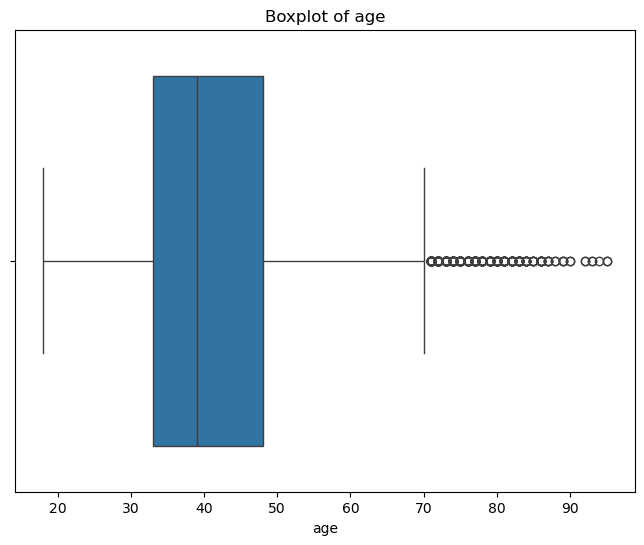

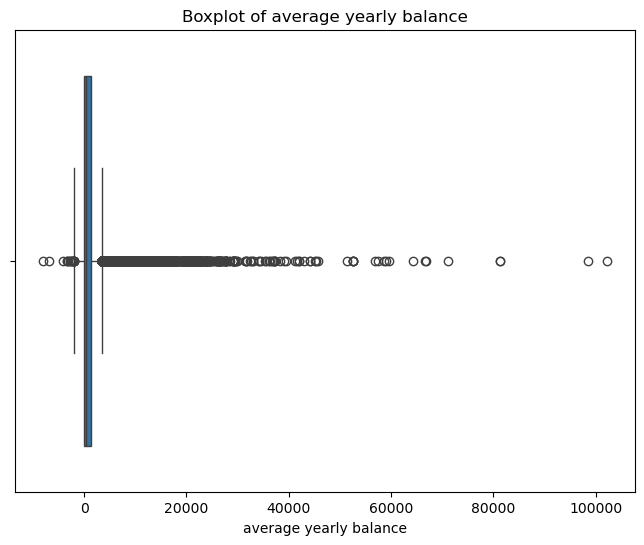

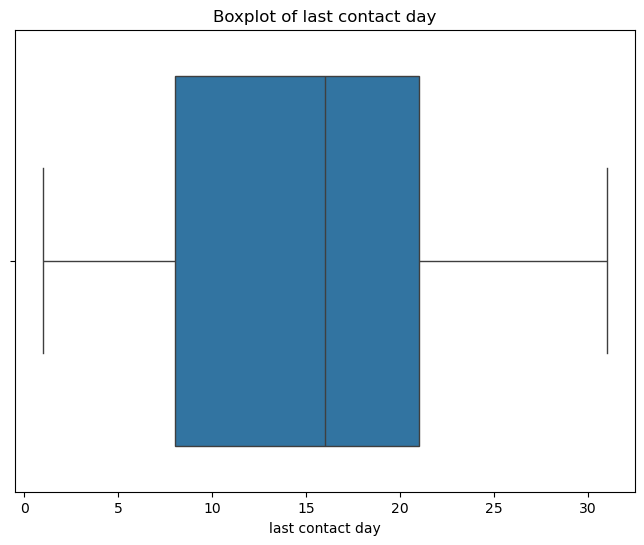

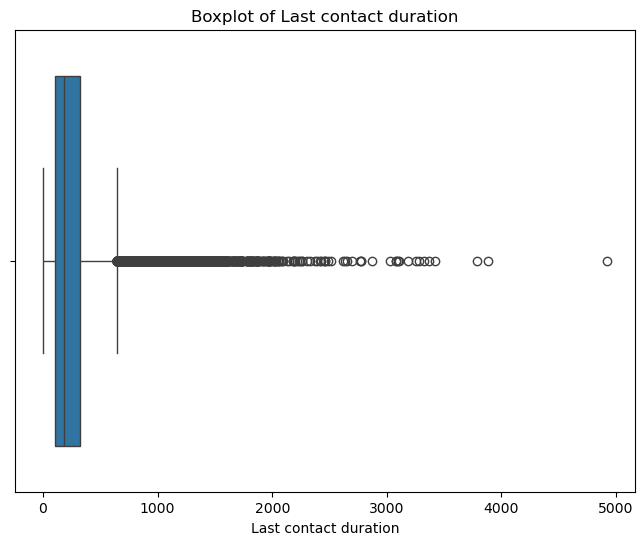

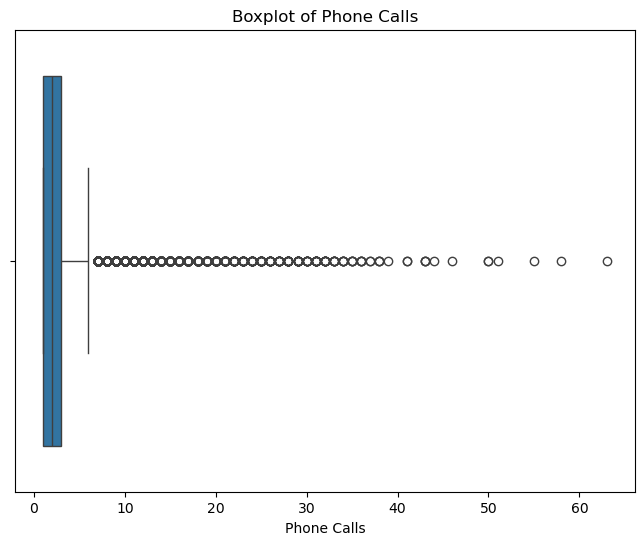

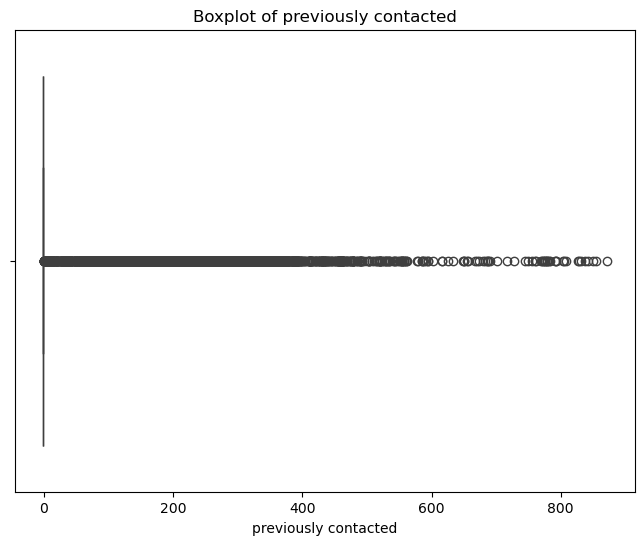

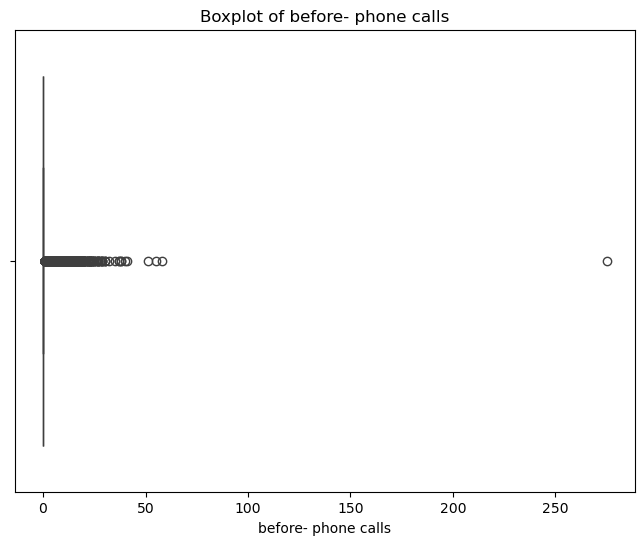

In [10]:

# outliers using boxplots for numerical features
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# Outlier Removal

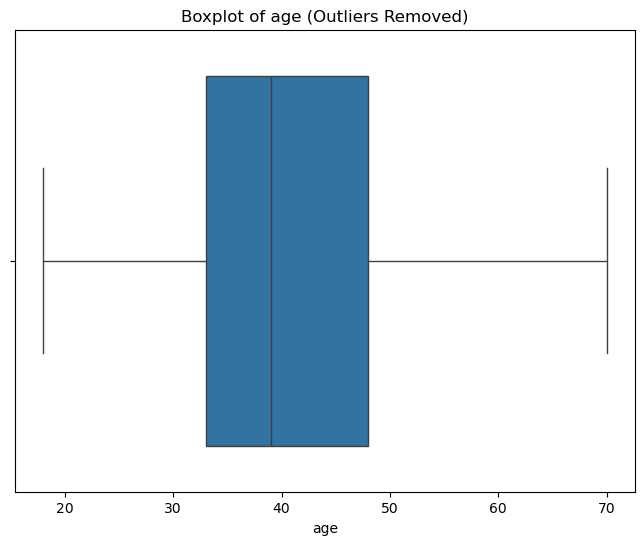

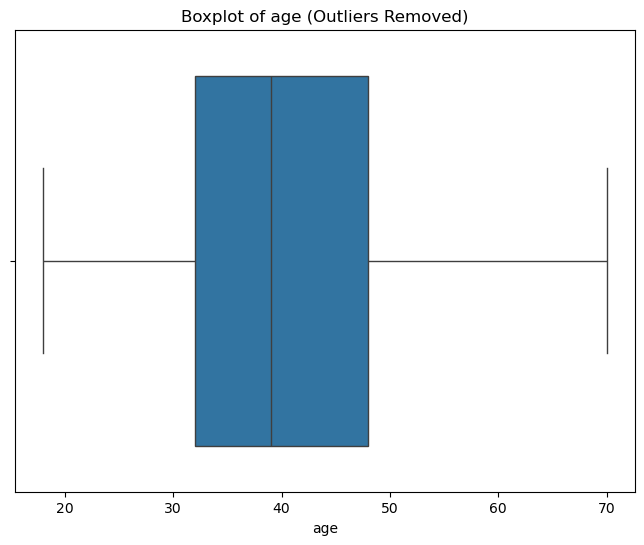

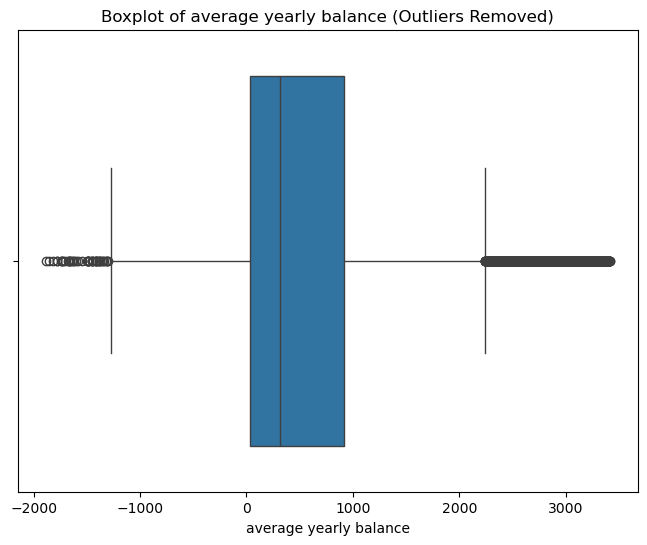

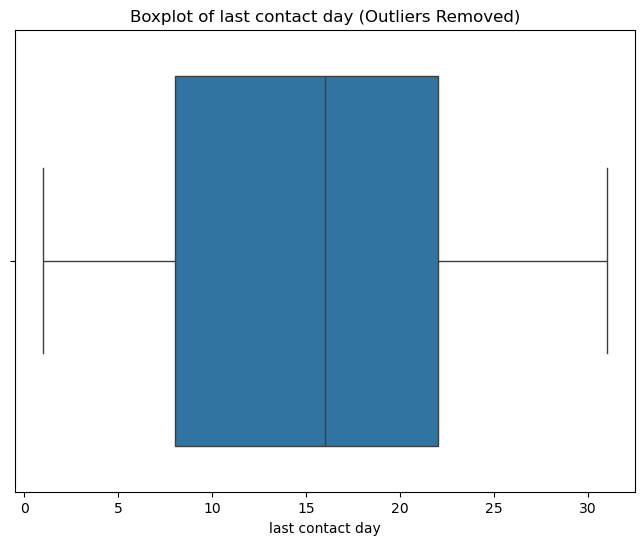

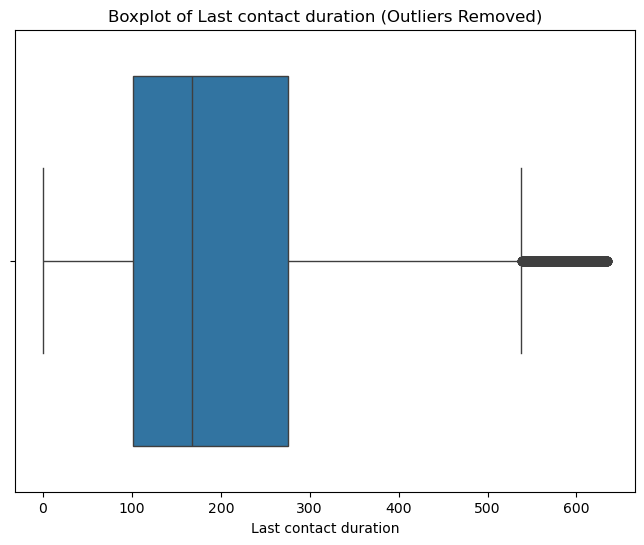

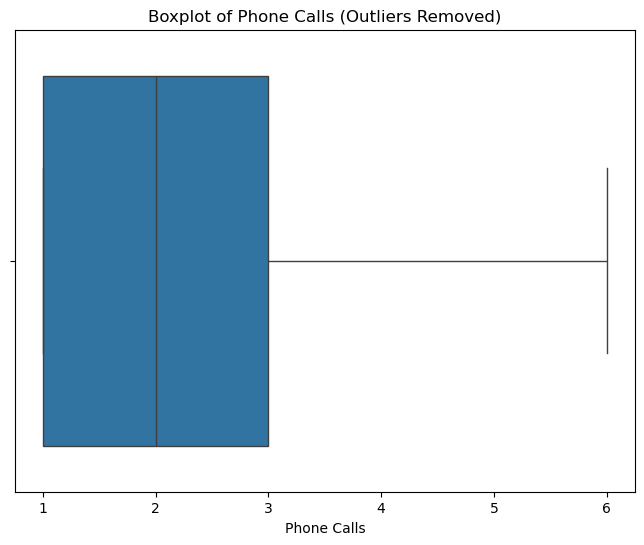

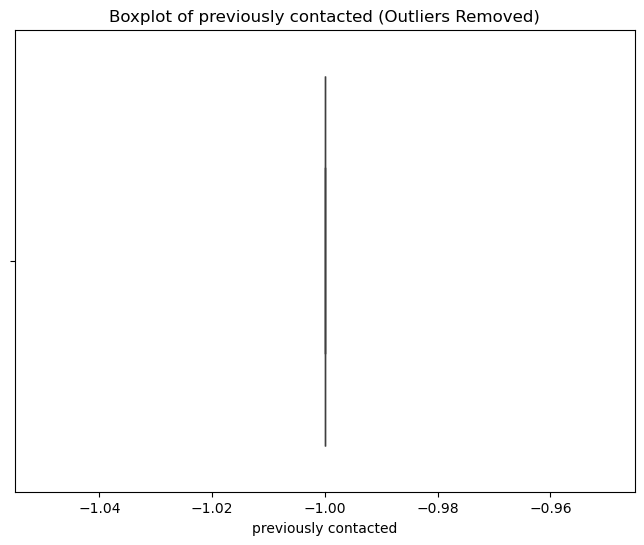

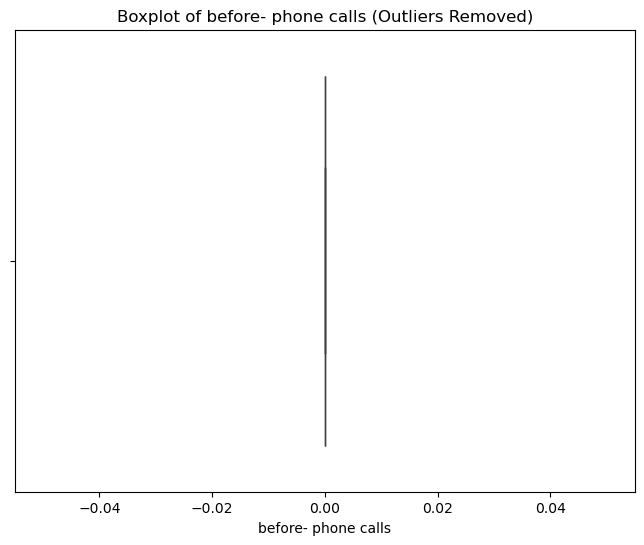

In [11]:
# IQR for outlier removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# usage for 'age' column (replace with your desired column)
df_filtered = remove_outliers_iqr(df, 'age')

# Visualize the data after outlier removal
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered['age'])  # Use the filtered DataFrame
plt.title('Boxplot of age (Outliers Removed)')
plt.show()


# Iterate through numerical features and remove outliers
for col in numerical_features:
    df = remove_outliers_iqr(df, col) # Update df in each iteration

# Verify outlier removal by plotting boxplots again
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()

# **Exploratory Data Analysis (EDA)**

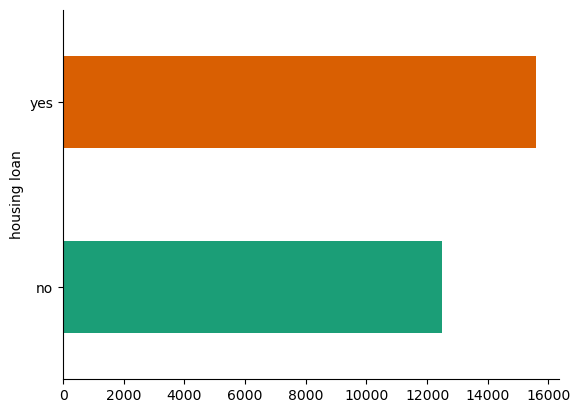

In [12]:
# title housing loan

df.groupby('housing loan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

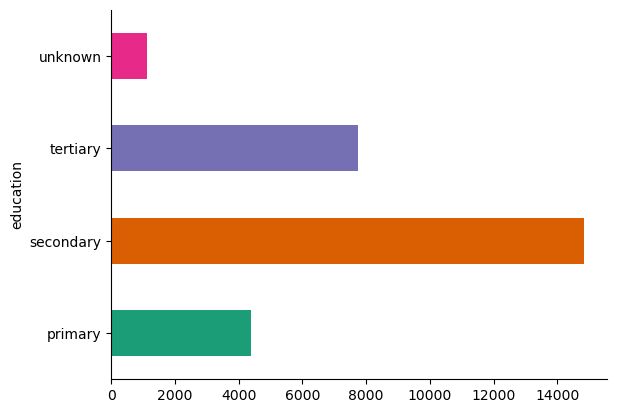

In [13]:
# title education

df.groupby('education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

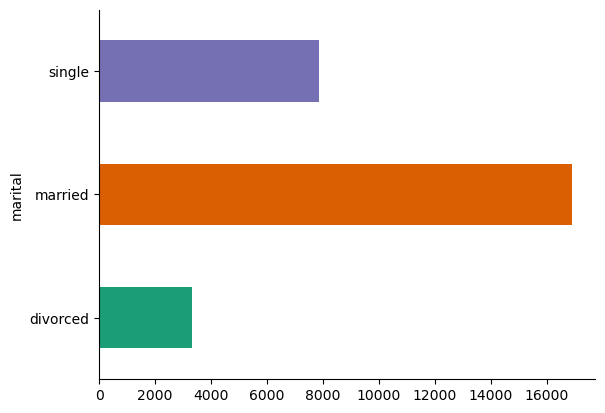

In [14]:
# title marital

df.groupby('marital').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

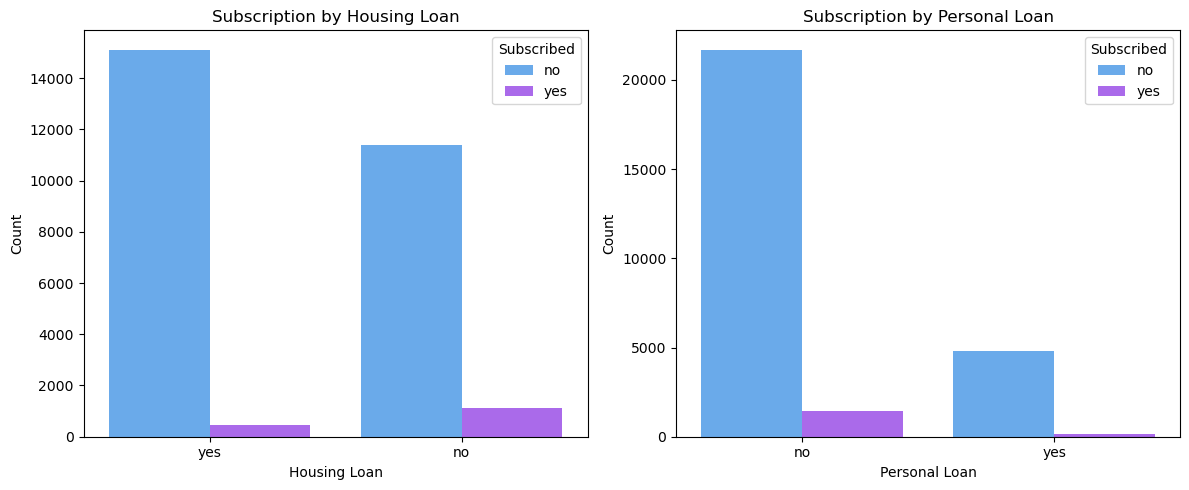

In [15]:
# Plot subscription by loan status
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x='housing loan', hue='client subscribed', palette='cool', ax=axes[0])
axes[0].set_title('Subscription by Housing Loan')
axes[0].set_xlabel('Housing Loan')
axes[0].set_ylabel('Count')
axes[0].legend(title='Subscribed')

sns.countplot(data=df, x='personal loan', hue='client subscribed', palette='cool', ax=axes[1])
axes[1].set_title('Subscription by Personal Loan')
axes[1].set_xlabel('Personal Loan')
axes[1].set_ylabel('Count')
axes[1].legend(title='Subscribed')

plt.tight_layout()
plt.show()

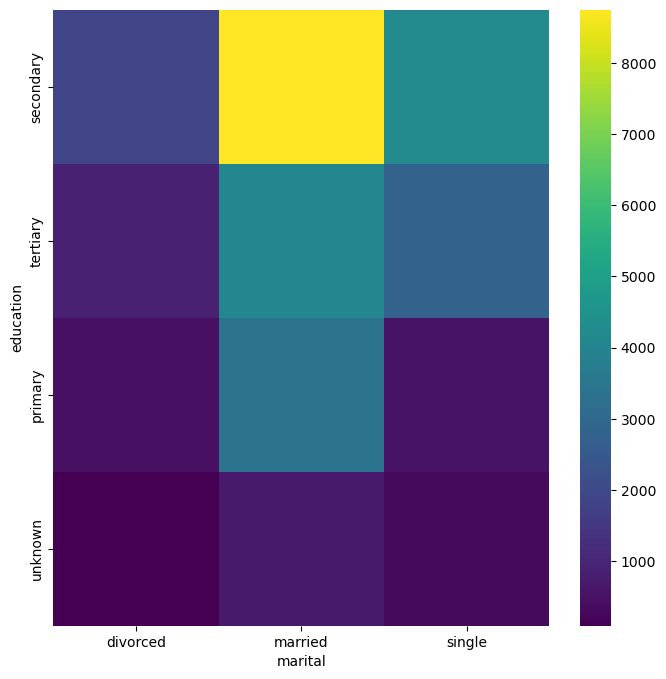

In [16]:
# title marital vs education

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['education'].value_counts()
    for x_label, grp in df.groupby('marital')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('marital')
_ = plt.ylabel('education')

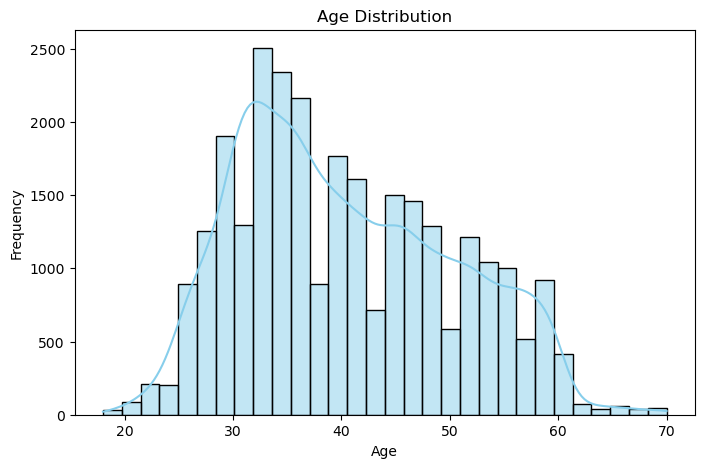

In [17]:
# Plot age distribution
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

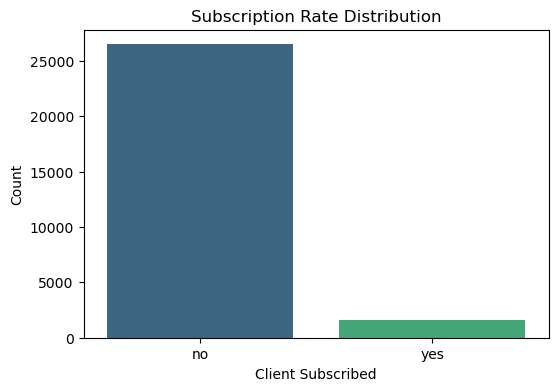

In [18]:
# Plot subscription rates
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='client subscribed', palette='viridis')
plt.title('Subscription Rate Distribution')
plt.xlabel('Client Subscribed')
plt.ylabel('Count')
plt.show()

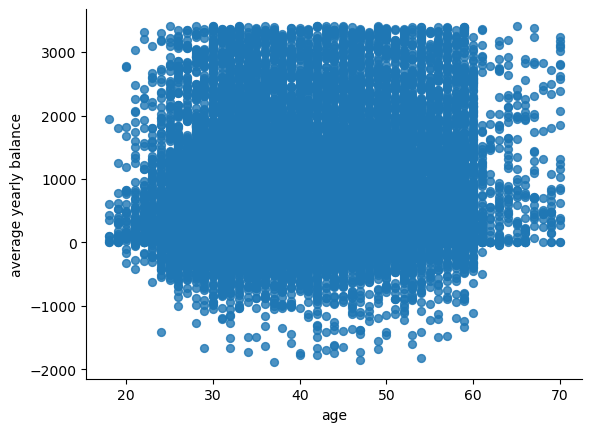

In [19]:
# title age vs average yearly balance

df.plot(kind='scatter', x='age', y='average yearly balance', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

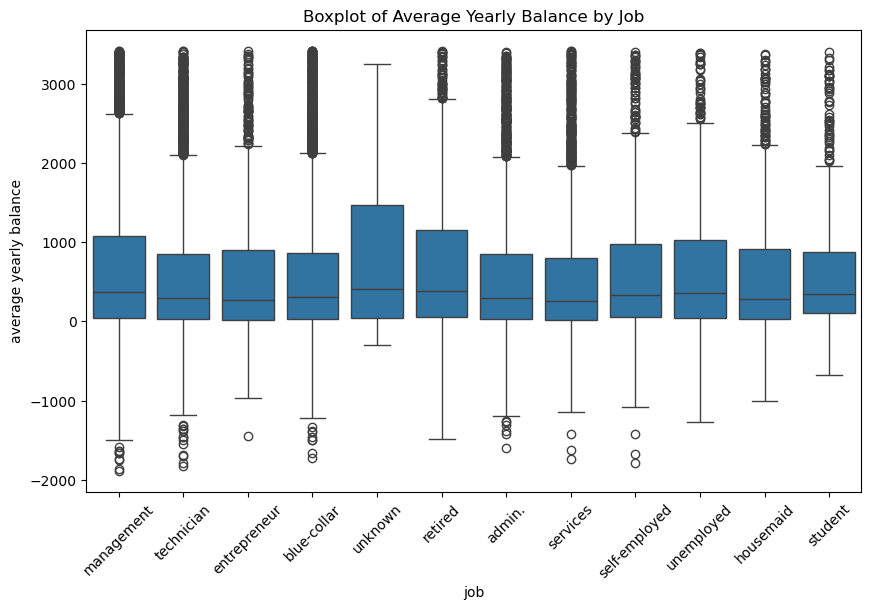

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job', y='average yearly balance', data=df)
plt.title('Boxplot of Average Yearly Balance by Job')
plt.xticks(rotation=45)
plt.show()

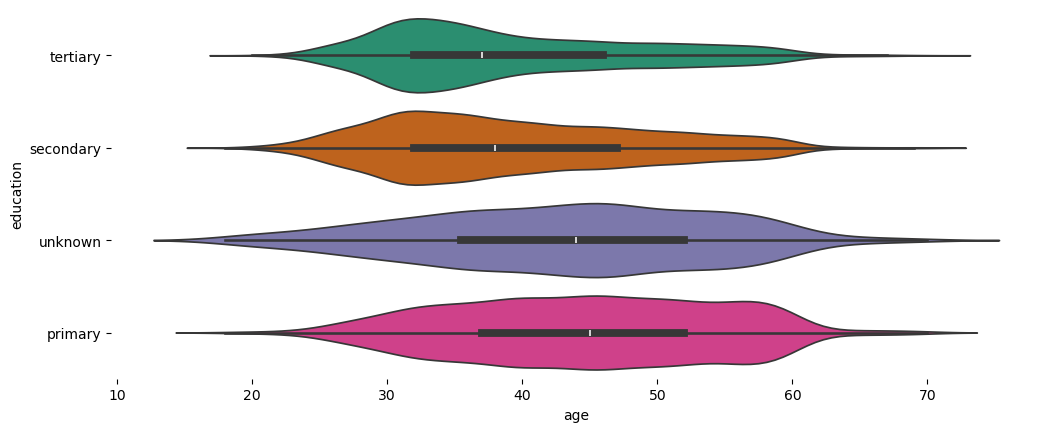

In [21]:
# title education vs age

figsize = (12, 1.2 * len(df['education'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='age', y='education', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

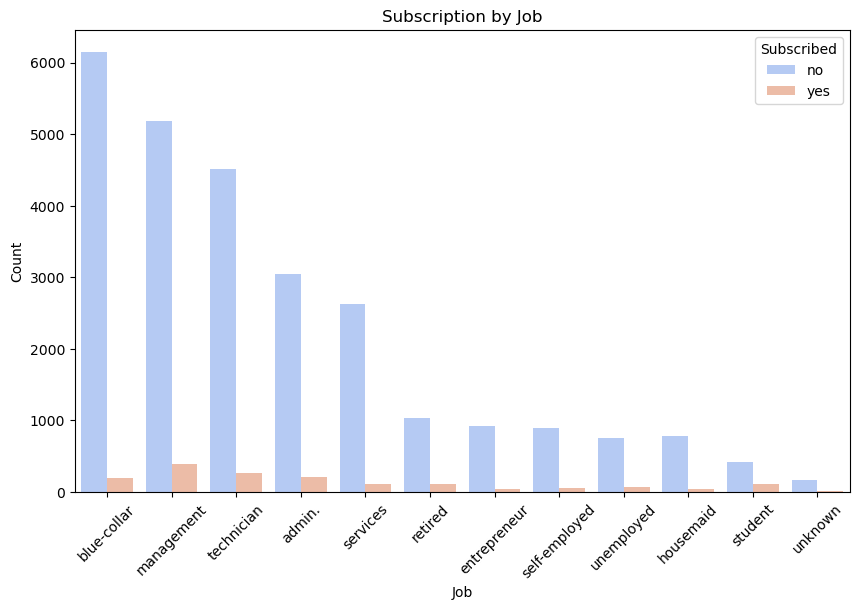

In [22]:
# Plot subscription by job
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='client subscribed', palette='coolwarm', order=df['job'].value_counts().index)
plt.title('Subscription by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscribed')
plt.show()


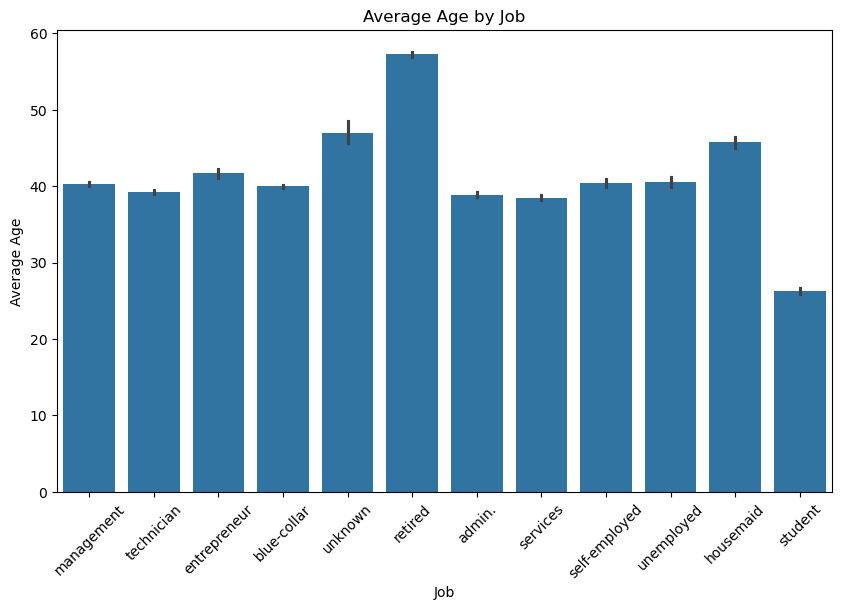

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='job', y='age', data=df)
plt.title('Average Age by Job')
plt.xlabel('Job')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.show()

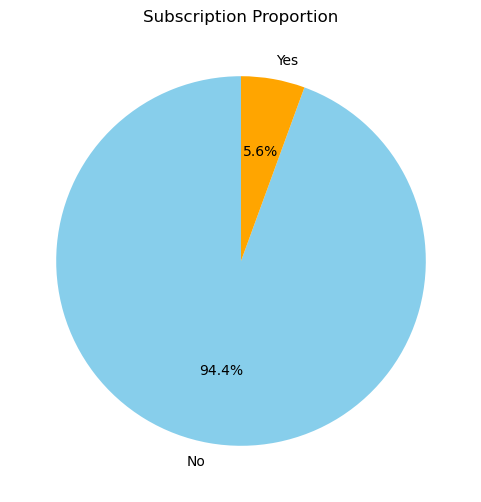

In [24]:
# Pie chart for client subscription
subscription_counts = df['client subscribed'].value_counts()
plt.figure(figsize=(6, 6))
subscription_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'], labels=['No', 'Yes'])
plt.title('Subscription Proportion')
plt.ylabel('')
plt.show()

# **Feature Engineering : Identify and encode categorical features using techniques like one-hot encoding or label encoding.**

In [25]:
from sklearn.preprocessing import LabelEncoder

# unique values from a specific column
unique_job = df['job'].unique()
unique_marital = df['marital'].unique()
unique_education = df['education'].unique()
unique_credit_default = df['credit-default'].unique()
unique_housing_loan = df['housing loan'].unique()
unique_loan = df['personal loan'].unique()
unique_communication = df['communication type'].unique()
unique_month = df['last contact month'].unique()
unique_campaign = df['previous marketing campaign'].unique()
unique_client= df['client subscribed'].unique()

df_encoded=df.copy()

# LabelEncoder object
label_encoder = LabelEncoder()

def label_encode(data):
  data['job']=label_encoder.fit_transform(data['job'])
  data['marital']=label_encoder.fit_transform(data['marital'])
  data['education']=label_encoder.fit_transform(data['education'])
  data['credit-default']=label_encoder.fit_transform(data['credit-default'])
  data['housing loan']=label_encoder.fit_transform(data['housing loan'])
  data['personal loan']=label_encoder.fit_transform(data['personal loan'])
  data['communication type']=label_encoder.fit_transform(data['communication type'])
  data['last contact month'] = label_encoder.fit_transform(data['last contact month'])
  data['previous marketing campaign']=label_encoder.fit_transform(data['previous marketing campaign'])
  data['client subscribed']=label_encoder.fit_transform(data['client subscribed'])
  return data

df_encoded = label_encode(df_encoded)
df_encoded.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0,0


In [26]:
df.tail()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **Split Data into Training and Testing Sets and Feature Selection**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder

X = df_encoded.drop('client subscribed', axis=1)
y = df_encoded['client subscribed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=10) # Select top 5 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Train a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Print the selected features and their importances
for i in range(len(selected_feature_names)):
    print(f"Feature: {selected_feature_names[i]}, Importance: {feature_importances[i]}")


Feature: job, Importance: 0.09078588077490496
Feature: marital, Importance: 0.039012072712684163
Feature: education, Importance: 0.04441368063501904
Feature: average yearly balance, Importance: 0.22853059876789783
Feature: housing loan, Importance: 0.02820598502796429
Feature: personal loan, Importance: 0.015559751228738983
Feature: communication type, Importance: 0.03457985800913661
Feature: last contact month, Importance: 0.15788482236795018
Feature: Last contact duration, Importance: 0.3014282521352534
Feature: Phone Calls, Importance: 0.05959909834045038


# **Feature Scaling**

In [28]:
from sklearn.preprocessing import MinMaxScaler

def feature_scaling(data):
  numerical_cols = ['average yearly balance','Last contact duration']
  # Initialize the MinMaxScaler
  scaler = MinMaxScaler()
  # Fit and transform the numerical features
  data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
  return data

df_encoded  = feature_scaling(df_encoded)
df_encoded.head()

,age,job,marital,education,credit-default,average yearly balance,housing loan,personal loan,communication type,last contact day,last contact month,Last contact duration,Phone Calls,previously contacted,before- phone calls,previous marketing campaign,client subscribed
0,58,4,1,2,0,0.760385,1,0,2,5,8,0.411672,1,-1,0,0,0
1,44,9,2,1,0,0.361216,1,0,2,5,8,0.238170,1,-1,0,0,0
2,33,2,1,1,0,0.356118,1,1,2,5,8,0.119874,1,-1,0,0,0
3,47,1,1,3,0,0.640106,1,0,2,5,8,0.145110,1,-1,0,0,0
4,33,11,2,3,0,0.355929,0,0,2,5,8,0.312303,1,-1,0,0,0


# **Model Building**

# **Build the ML Model, Model Evaluation, Hyperparameter Tuning, Save the Model**

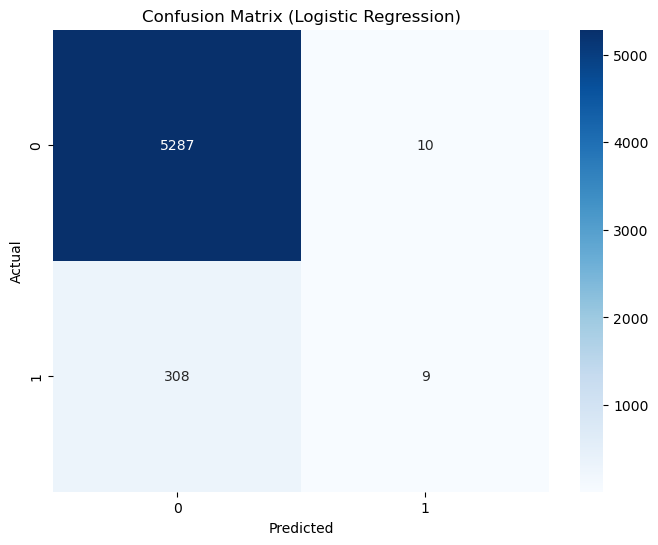

Results for Logistic Regression:
Accuracy: 0.9433558959743499
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5297
           1       0.47      0.03      0.05       317

    accuracy                           0.94      5614
   macro avg       0.71      0.51      0.51      5614
weighted avg       0.92      0.94      0.92      5614

------------------------------


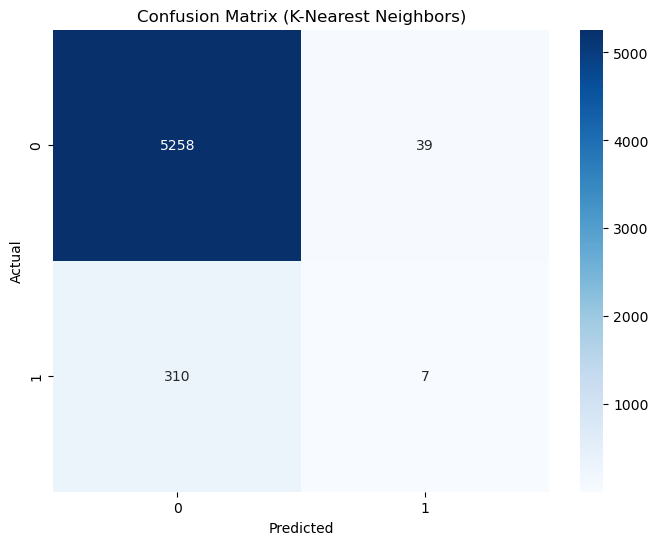

Results for K-Nearest Neighbors:
Accuracy: 0.9378339864624153
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5297
           1       0.15      0.02      0.04       317

    accuracy                           0.94      5614
   macro avg       0.55      0.51      0.50      5614
weighted avg       0.90      0.94      0.92      5614

------------------------------


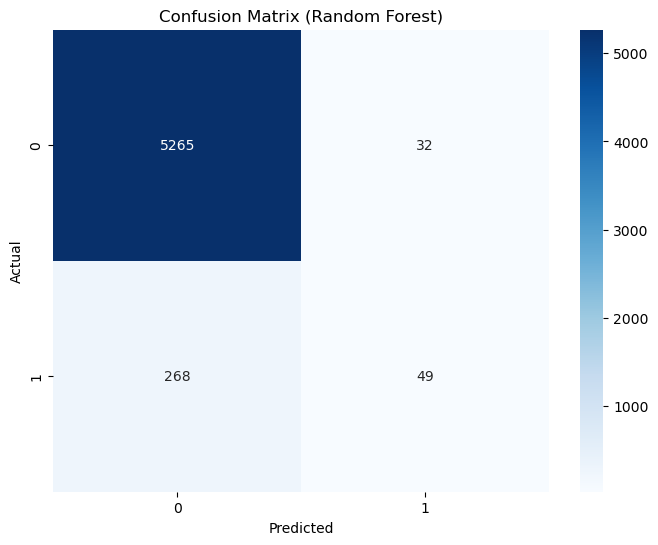

Results for Random Forest:
Accuracy: 0.9465621660135376
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5297
           1       0.60      0.15      0.25       317

    accuracy                           0.95      5614
   macro avg       0.78      0.57      0.61      5614
weighted avg       0.93      0.95      0.93      5614

------------------------------


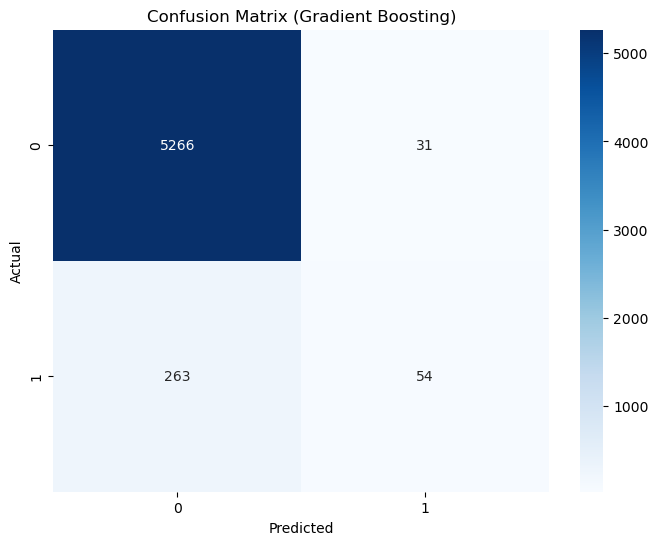

Results for Gradient Boosting:
Accuracy: 0.9476309226932669
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5297
           1       0.64      0.17      0.27       317

    accuracy                           0.95      5614
   macro avg       0.79      0.58      0.62      5614
weighted avg       0.93      0.95      0.93      5614

------------------------------


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
}

results = {}
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)  # Use selected features
    y_pred = model.predict(X_test_selected) # Use selected features
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    results[model_name] = {
        "Accuracy": accuracy,
        "Confusion Matrix": cm,
        "Classification Report": cr
    }

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix ({model_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print results
    print(f"Results for {model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{cr}")
    print("-" * 30)

# **Find the best model based on accuracy**


In [30]:

best_model_name = max(results, key=lambda k: results[k]["Accuracy"])
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['Accuracy']}")


Best Model: Gradient Boosting with accuracy 0.9476309226932669


## **Hyperparameter Tuning**

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    }
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_selected, y_train)
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters for {best_model_name}: {grid_search.best_params_}")
y_pred_tuned = best_model.predict(X_test_selected)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned accuracy of {best_model_name}: {accuracy_tuned}")

Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Tuned accuracy of Gradient Boosting: 0.9476309226932669


In [32]:
# pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', best_model)
])
import joblib
# Fit the pipeline to your training data
pipeline.fit(X_train, y_train)

# Save the pipeline
joblib.dump(pipeline, f'{best_model_name}_pipeline.pkl')

['Gradient Boosting_pipeline.pkl']

# **Test with Unseen Data**

In [33]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# saved pipeline
loaded_pipeline = joblib.load('Gradient Boosting_pipeline.pkl')

# Load new unseen data
new_df = pd.read_csv('unseen_data.csv')

# Preprocess the new data (assuming you have the label_encode and feature_scaling functions defined)
new_df = label_encode(new_df)
#new_df = feature_scaling(new_df) # Scaling is already part of the pipeline

# Separate features and target variable
new_X = new_df.drop('client subscribed', axis=1)
new_y = new_df['client subscribed']

# Make predictions using the loaded pipeline
new_y_pred = loaded_pipeline.predict(new_X)

# Evaluate the model if you have the true labels
if 'new_y' in locals():
    accuracy_unseen = accuracy_score(new_y, new_y_pred)
    print(f"Accuracy on unseen data: {accuracy_unseen}")
    print(classification_report(new_y, new_y_pred))
else:
    print("Predictions for unseen data:")
new_y_pred

Accuracy on unseen data: 0.74
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        37
           1       0.00      0.00      0.00        13

    accuracy                           0.74        50
   macro avg       0.37      0.50      0.43        50
weighted avg       0.55      0.74      0.63        50



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [34]:
for i in range(len(new_y_pred)):
  if new_y_pred[i] == 0:
    print('Not Subscribed')
  else:
    print('Subscribed')

Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed
Not Subscribed


# **Interpretation of Results (Conclusion):**

## **This project successfully demonstrated the potential of machine learning in predicting term deposit subscriptions for a Portuguese banking institution. By leveraging models like Gradient Boosting, we achieved high predictive accuracy and identified key factors such as job, age, and education that influence client decisions. While the results are promising, addressing data imbalances and refining preprocessing techniques can further improve model performance. Ultimately, these insights can help the bank enhance its direct marketing strategies, engage customers more effectively, and make data-driven decisions for better outcomes**